# ***Exploratory Data Analysis for Spotify Dataset***
***Developed by: Valentina Bueno Collazos***

This notebook outlines the steps taken to perform an EDA and later tranformations on the Spotify data taken from a Kaggle repository to be able to merge this data with the one extracted from the other 2 data sources (API, Grammy). This is a dataset of Spotify tracks over a range of 125 different genres that includes a number of around 114k records in 21 columns. Each track has some audio features associated with it. 

This EDA is conducted in order to know the data i have and transform it to perform a visualization with a clear analysis objective: to explore the relationship between Grammy awards, musical characteristics (Spotify) and popularity on Last.fm of an artist.


To start with this EDA I need to import the necessary libraries to develop this notebook.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

The working directory is changed so that the system can locate the spotify dataset.

In [2]:
os.chdir("..")
print(os.getcwd())

c:\Users\valen\Desktop\etl_workshop002


In [3]:
spotify_df = pd.read_csv("data/raw/spotify_dataset.csv")
spotify_df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


### ***Dataset Column Descriptions***

- **track_id**: Unique Spotify ID for the track.  
- **artists**: Names of the artists who performed the track, separated by `;`.  
- **album_name**: Name of the album where the track appears.  
- **track_name**: Title of the track.  
- **popularity**: Track popularity, ranging from 0 to 100 (100 = most popular).  
- **duration_ms**: Track duration in milliseconds.  
- **explicit**: Indicates whether the track contains explicit lyrics (`true` = yes, `false` = no or unknown).  
- **danceability**: Describes how suitable a track is for dancing. Values range from 0.0 (least danceable) to 1.0 (most danceable).  
- **energy**: Perceptual measure of intensity and activity, from 0.0 to 1.0.  
- **key**: Musical key the track is in (as an integer value).  
- **loudness**: Overall loudness of the track in decibels (dB).  
- **mode**: Modality of the track: `1` = major, `0` = minor.  
- **speechiness**: Detects the presence of spoken words in a track. Values closer to 1.0 indicate more speech-like content.  
- **acousticness**: Confidence measure (0.0 to 1.0) of whether the track is acoustic. Higher values indicate higher confidence.  
- **instrumentalness**: Predicts the likelihood of the track having no vocals. Values closer to 1.0 suggest a purely instrumental track.  
- **liveness**: Estimates the presence of a live audience. Higher values indicate a higher probability of live performance.  
- **valence**: Describes the musical positiveness conveyed by the track. Values near 1.0 indicate a more positive (happy) sound, while values near 0.0 indicate a more negative (sad) sound.  
- **tempo**: Estimated tempo of the track in beats per minute (BPM).  
- **time_signature**: Estimated time signature (meter), indicating the number of beats per bar. Ranges typically from 3 to 7 (e.g., 4 = 4/4).  
- **track_genre**: Genre of the track.

### ***Validations: finding and handling outliers, duplicates and null values***

General overview of the Dataframe

After loading the data into the Dataframe, the following general validations are performed:

- The size of the dataframe.
- Information about each column in the dataframe (data type, entries and non-null values).
- Statistical description of both numerical and categorical columns.
- Presence of duplicate records in the dataframe.

In [4]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

taking into account the fact that I alredy have a `track_id` I'm gonna drop the `Unnamed: 0` column cause it is only adding noise to the data.

Also, given the analysis goal the following columns will be eliminated: `album_name`, `key`, `mode`, `time_signature`, `tempo`, `time_signature`

In [5]:
spotify_df = spotify_df.drop(columns=["Unnamed: 0", "album_name", "key", "mode", "time_signature", "tempo", "time_signature"])

In [6]:
spotify_df.describe()

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,-8.258960,0.084652,0.314910,0.156050,0.213553,0.474068
std,22.305078,1.072977e+05,0.173542,0.251529,5.029337,0.105732,0.332523,0.309555,0.190378,0.259261
min,0.000000,0.000000e+00,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,-10.013000,0.035900,0.016900,0.000000,0.098000,0.260000
50%,35.000000,2.129060e+05,0.580000,0.685000,-7.004000,0.048900,0.169000,0.000042,0.132000,0.464000
75%,50.000000,2.615060e+05,0.695000,0.854000,-5.003000,0.084500,0.598000,0.049000,0.273000,0.683000
max,100.000000,5.237295e+06,0.985000,1.000000,4.532000,0.965000,0.996000,1.000000,1.000000,0.995000


In [7]:
spotify_df.describe(include = "bool")

,explicit
count,114000
unique,2
top,False
freq,104253


In [8]:
spotify_df.describe(include = "object")

,track_id,artists,track_name,track_genre
count,114000,113999,113999,114000
unique,89741,31437,73608,114
top,6S3JlDAGk3uu3NtZbPnuhS,The Beatles,Run Rudolph Run,acoustic
freq,9,279,151,1000


##### ***Checking for Duplicate Songs Using `track_id`***

Since `track_id` should be unique for each song, we expect to have as many unique `track_id`s as the total number of records (e.g., 114,000). If not, it suggests that some songs may be duplicated. Below are the steps taken to investigate and remove duplicates:

1. **General Duplicate Check**  

   The first cell counts fully duplicated rows in the dataset using `spotify_df.duplicated()`.  
   - **Result**: 450 fully duplicated rows removed.

In [9]:
print(f"Number of duplicates: {spotify_df.duplicated().sum()}")

Number of duplicates: 450


In [10]:
spotify_df = spotify_df.drop_duplicates()
print(f"Number of duplicates: {spotify_df.duplicated().sum()}")

Number of duplicates: 0


2. **Checking for Duplicates Based on `track_id` Only**

   This cell checks for duplicate entries based only on the `track_id` column.  
   - **Result**: 23,809 rows have the same `track_id` as another row, indicating potential song duplicates that need to be checked and removed.

In [11]:
print(f"Number of duplicates by track_id: {spotify_df.duplicated(subset='track_id').sum()}")

Number of duplicates by track_id: 23809


In [12]:
duplicates = spotify_df[spotify_df.duplicated(subset='track_id', keep=False)]
duplicates.head()

,track_id,artists,track_name,popularity,duration_ms,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,73,230666,False,0.676,0.461,-6.746,0.1430,0.0322,0.000001,0.3580,0.7150,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost - Acoustic,55,149610,False,0.420,0.166,-17.235,0.0763,0.9240,0.000006,0.1010,0.2670,acoustic
5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,58,214240,False,0.688,0.481,-8.807,0.1050,0.2890,0.000000,0.1890,0.6660,acoustic
6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Say Something,74,229400,False,0.407,0.147,-8.822,0.0355,0.8570,0.000003,0.0913,0.0765,acoustic
7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,I'm Yours,80,242946,False,0.703,0.444,-9.331,0.0417,0.5590,0.000000,0.0973,0.7120,acoustic


In [13]:
value = "5SuOikwiRyPMVoIQDJUgSV"
spotify_df[spotify_df["track_id"]==value]

,track_id,artists,track_name,popularity,duration_ms,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,73,230666,False,0.676,0.461,-6.746,0.143,0.0322,0.000001,0.358,0.715,acoustic
62102,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,73,230666,False,0.676,0.461,-6.746,0.143,0.0322,0.000001,0.358,0.715,j-pop
99152,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,73,230666,False,0.676,0.461,-6.746,0.143,0.0322,0.000001,0.358,0.715,singer-songwriter
102151,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,73,230666,False,0.676,0.461,-6.746,0.143,0.0322,0.000001,0.358,0.715,songwriter


In [14]:
spotify_df = spotify_df.drop_duplicates(subset='track_id')
print(f"Number of duplicates by track_id: {spotify_df.duplicated(subset='track_id').sum()}")

Number of duplicates by track_id: 0


##### ***Cleaning and Normalizing Text Fields***

To ensure consistency and prepare the data for analysis, the `artists` and `track_name` columns are cleaned and normalized using the following steps:

- **Strip whitespace**: Removes leading and trailing spaces.
- **Remove quotes**: Eliminates both single and double quotes from the text using regular expressions.
- **Normalize spacing**: Replaces multiple spaces with a single space.

Only the most significant things are removed taking into account that some of the artist names might contain special characters and are written in other languages like russian, japanese or chinese. These steps help avoid mismatches caused by inconsistent formatting when analyzing or merging data.

In [15]:
spotify_df['artists'] = (
    spotify_df['artists']
    .str.strip()  
    .str.replace(r'[\"]', '', regex=True) 
    .str.replace(r'\s+', ' ', regex=True) 
)

spotify_df['track_name'] = (
    spotify_df['track_name']
    .str.strip() 
    .str.replace(r'[\"]', '', regex=True)
    .str.replace(r'\s+', ' ', regex=True)
)

##### ***Extracting the Primary Artist***

The `artists` column contains multiple artists separated by semicolons (`;`).  

This step extracts only the first artist listed for each song, assuming it represents the primary artist, and stores it in a new column called `primary_artist`.

In [16]:
spotify_df['primary_artist'] = spotify_df['artists'].str.split(';').str[0]

##### ***Creating the `is_feature` Column***

This step creates a new boolean column called `is_feature` to indicate whether a song is a feature.  

If the `artists` string contains a semicolon (`;`), it suggests multiple artists are involved (e.g., collaborations), and the value is set to `True`.

A sample of 5 rows is then displayed to verify the new column and confirm it correctly identifies featured tracks.

In [17]:
spotify_df['is_feature'] = spotify_df['artists'].str.contains(';').astype('bool') 

spotify_df[['track_name', 'artists', 'is_feature']].sample(5)

,track_name,artists,is_feature
73918,Waiting For,Kolombo,False
4387,Lionheart,Stephan Moccio,False
10532,Hey Boy Hey Girl,The Chemical Brothers,False
79195,Hallelujah,Rufus Wainwright,False
352,Stay - Acoustic,Jonah Baker,False


This boxplot visualizes the distribution of track popularity based on whether the track includes featured artists.

- **Insight**: This plot helps determine if songs with featured artists tend to be more or less popular compared to solo performances and if adding this column was a significant decision.

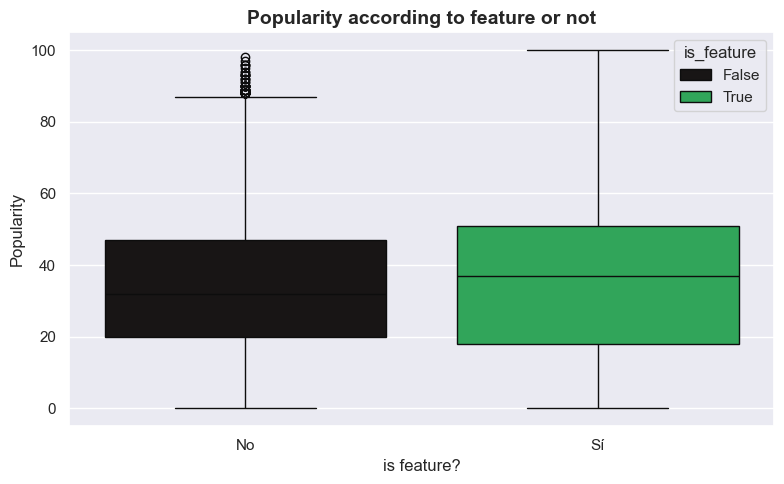

In [18]:
plt.figure(figsize=(8, 5))
sns.set(style="darkgrid")

sns.boxplot(
    data=spotify_df,
    x='is_feature',
    y='popularity',
    hue='is_feature',
    palette={False: "#191414", True: "#1DB954"}
)

plt.title('Popularity according to feature or not', fontsize=14, weight='bold')
plt.xlabel('is feature?', fontsize=12)
plt.ylabel('Popularity', fontsize=12)
plt.xticks([0, 1], ['No', 'Sí'])
plt.tight_layout()
plt.show()


***Interpretation***:
- Tracks with featured artists (`True`) exhibit a slightly higher **median popularity** than solo tracks.
- The **interquartile range (IQR)** is also larger for featured tracks, indicating more variability in their popularity.
- The boxplot for featured tracks shows **negative skewness** (left-skewed), as the higher whisker is longer and the median is closer to the upper quartile.  
  This suggests that while many featured tracks achieve moderate to high popularity, a substantial number of them have low popularity scores, pulling the distribution toward the lower end.
- In contrast, non-featured tracks show a more symmetric distribution but with a high number of **outliers** in the upper range, indicating that a few solo tracks reach very high popularity, though most remain lower.

##### ***Dataset Missing Values***

In [19]:
print(f"Dataset Shape: {spotify_df.shape}")
print("\nMissing Values per Column:")
print(spotify_df.isnull().sum().sort_values())

Dataset Shape: (89741, 17)

Missing Values per Column:
track_id            0
popularity          0
explicit            0
duration_ms         0
danceability        0
energy              0
speechiness         0
loudness            0
liveness            0
valence             0
acousticness        0
instrumentalness    0
track_genre         0
is_feature          0
artists             1
track_name          1
primary_artist      1
dtype: int64


Given that there's only 1 null in 3 of the columns of the Dataframe I decided just to remove those records

In [20]:
spotify_df = spotify_df[spotify_df['artists'].notna()]

In [21]:
print("\nMissing Values per Column:")
print(spotify_df.isnull().sum().sort_values())


Missing Values per Column:
track_id            0
artists             0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
track_genre         0
primary_artist      0
is_feature          0
dtype: int64


##### ***Standardizing and Categorizing Columns***
In this section, we will:

- **Standardize all text-based columns** to ensure consistent formatting.
- **Categorize selected numerical columns** by transforming continuous values into discrete categories. This allows for better grouping, analysis, and visualization of trends or patterns across defined intervals.

These preprocessing steps help improve the quality and interpretability of the dataset for subsequent analysis.

The `duration_ms` column, which represents track duration in milliseconds, is converted to minutes for better interpretability

In [22]:
spotify_df.loc[:, 'duration_min'] = round(spotify_df['duration_ms'] / (1000 * 60), 2)
spotify_df = spotify_df.drop(columns=['duration_ms'])

##### ***Categorizing Numerical Audio Features***

This function, `categorize_features(df)`, transforms several continuous audio features into categorical labels for easier interpretation and analysis Here's a summary of the transformations:

- **`duration_min`**:  
  Categorized into `Short` (<3 min), `Medium` (3–4 min), and `Long` (>4 min) in `duration_cat`.

- **`popularity`**:  
  Categorized into `Low` (0–40), `Medium` (41–70), and `High` (71–100).

- **`danceability`, `energy`**:  
  Scored between 0 and 1; binned into `Low`, `Medium`, and `High`.

- **`loudness`**:  
  Measured in dB (typically negative); categorized as:
  - `Quiet` (< -20 dB)
  - `Moderate` (-20 to -10 dB)
  - `Loud` (> -10 dB)

- **`speechiness`, `acousticness`**:  
  Scored between 0 and 1; categorized as `Low`, `Moderate`, or `High`.

- **`instrumentalness`**:  
  Indicates the likelihood a track is instrumental. Binned into:
  - `Vocal` (low values)
  - `Mixed` (medium)
  - `Instrumental` (high values)

- **`liveness`**:  
  Estimates presence of an audience. Categorized into: `Studio`, `Hybrid`, or `Live`

- **`valence`**:  
  Measures musical positivity. Binned into: `Sad` (low), `Neutral` (medium), and `Happy` (high)

In [23]:
def categorize_features(df):
    df['duration_cat'] = pd.cut(df['duration_min'],
                                   bins=[0, 3, 4, float('inf')],
                                   labels=['Short (<3 min)', 'Medium (3-4 min)', 'Long (>4 min)'])

    df['popularity_cat'] = pd.cut(df['popularity'],
                                   bins=[-1, 40, 70, 100],
                                   labels=['Low', 'Medium', 'High'])

    df['danceability'] = pd.cut(df['danceability'],
                                     bins=[-0.01, 0.4, 0.7, 1.0],
                                     labels=['Low', 'Medium', 'High'])

    df['energy'] = pd.cut(df['energy'],
                               bins=[-0.01, 0.4, 0.7, 1.0],
                               labels=['Low', 'Medium', 'High'])

    df['loudness'] = pd.cut(df['loudness'],
                                 bins=[-60, -20, -10, 0],
                                 labels=['Quiet', 'Moderate', 'Loud'])

    df['speechiness'] = pd.cut(df['speechiness'],
                                    bins=[-0.01, 0.33, 0.66, 1.0],
                                    labels=['Low', 'Moderate', 'High'])

    df['acousticness'] = pd.cut(df['acousticness'],
                                     bins=[-0.01, 0.3, 0.7, 1.0],
                                     labels=['Low', 'Moderate', 'High'])

    df['instrumentalness'] = pd.cut(df['instrumentalness'],
                                         bins=[-0.01, 0.3, 0.7, 1.0],
                                         labels=['Vocal', 'Mixed', 'Instrumental'])

    df['liveness'] = pd.cut(df['liveness'],
                                 bins=[-0.01, 0.3, 0.7, 1.0],
                                 labels=['Studio', 'Hybrid', 'Live'])

    df['valence'] = pd.cut(df['valence'],
                                bins=[-0.01, 0.3, 0.7, 1.0],
                                labels=['Sad', 'Neutral', 'Happy'])

    return df

In [24]:
spotify_df = categorize_features(spotify_df)

In [25]:
spotify_df.head()

,track_id,artists,track_name,popularity,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,track_genre,primary_artist,is_feature,duration_min,duration_cat,popularity_cat
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,73,False,Medium,Medium,Loud,Low,Low,Vocal,Hybrid,Happy,acoustic,Gen Hoshino,False,3.84,Medium (3-4 min),High
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost - Acoustic,55,False,Medium,Low,Moderate,Low,High,Vocal,Studio,Sad,acoustic,Ben Woodward,False,2.49,Short (<3 min),Medium
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,57,False,Medium,Low,Loud,Low,Low,Vocal,Studio,Sad,acoustic,Ingrid Michaelson,True,3.51,Medium (3-4 min),Medium
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Can't Help Falling In Love,71,False,Low,Low,Moderate,Low,High,Vocal,Studio,Sad,acoustic,Kina Grannis,False,3.37,Medium (3-4 min),High
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,82,False,Medium,Medium,Loud,Low,Moderate,Vocal,Studio,Sad,acoustic,Chord Overstreet,False,3.31,Medium (3-4 min),High


In [26]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89740 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   track_id          89740 non-null  object  
 1   artists           89740 non-null  object  
 2   track_name        89740 non-null  object  
 3   popularity        89740 non-null  int64   
 4   explicit          89740 non-null  bool    
 5   danceability      89740 non-null  category
 6   energy            89740 non-null  category
 7   loudness          89672 non-null  category
 8   speechiness       89740 non-null  category
 9   acousticness      89740 non-null  category
 10  instrumentalness  89740 non-null  category
 11  liveness          89740 non-null  category
 12  valence           89740 non-null  category
 13  track_genre       89740 non-null  object  
 14  primary_artist    89740 non-null  object  
 15  is_feature        89740 non-null  bool    
 16  duration_min      89740 no

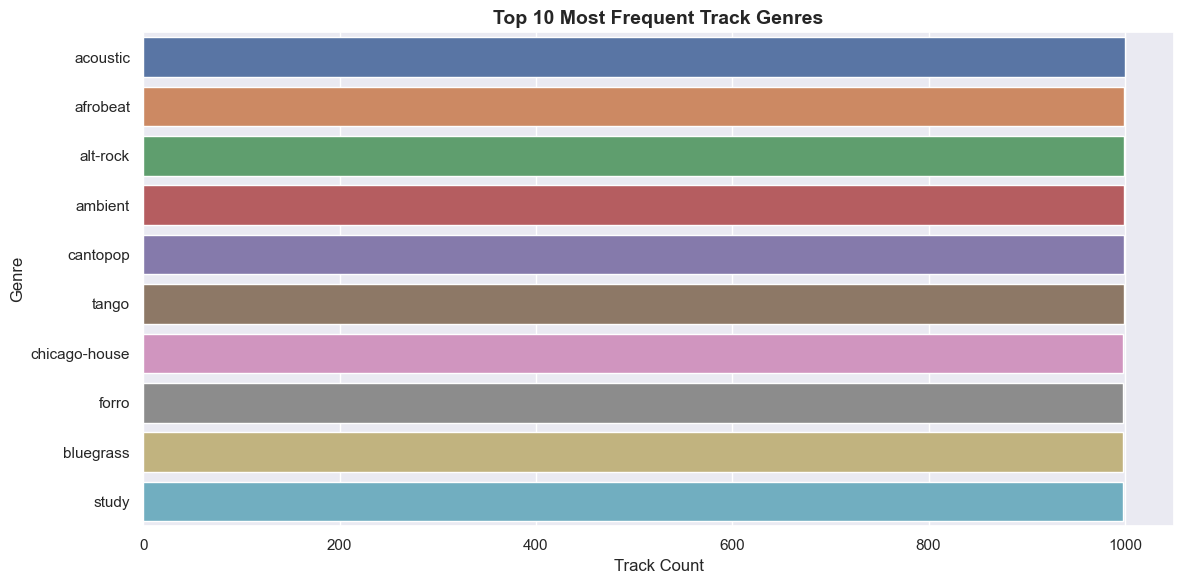

In [27]:
plt.figure(figsize=(12, 6))
top_genres = spotify_df['track_genre'].value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, hue= top_genres.index, legend= False, palette='deep')
plt.title('Top 10 Most Frequent Track Genres', fontsize=14, weight='bold')
plt.xlabel('Track Count')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

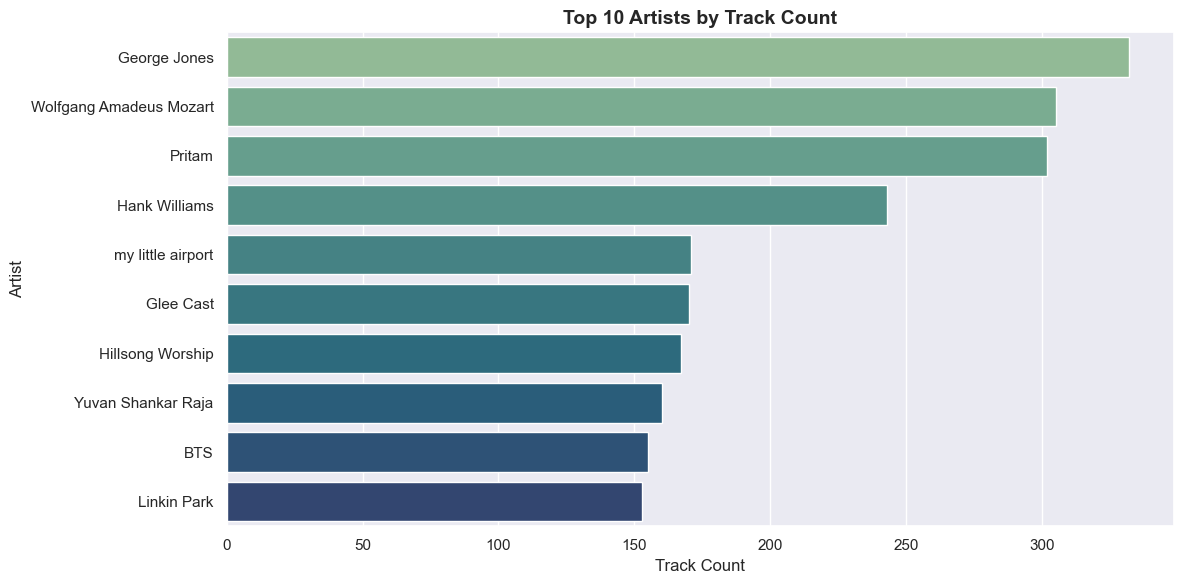

In [28]:
plt.figure(figsize=(12, 6))
top_artists = spotify_df['primary_artist'].value_counts().head(10)
sns.barplot(x=top_artists.values, y=top_artists.index, hue= top_artists.index, legend= False, palette='crest')
plt.title('Top 10 Artists by Track Count', fontsize=14, weight='bold')
plt.xlabel('Track Count')
plt.ylabel('Artist')
plt.tight_layout()
plt.show()

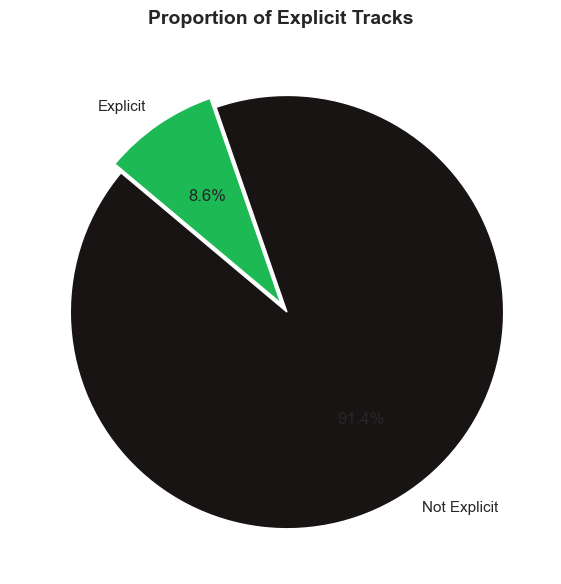

In [29]:
plt.figure(figsize=(6, 6))
explicit_counts = spotify_df['explicit'].value_counts()
plt.pie(explicit_counts, labels=explicit_counts.index.map({True: 'Explicit', False: 'Not Explicit'}),
        autopct='%1.1f%%', colors=["#191414","#1DB954"], startangle=140, explode=(0.05, 0))
plt.title('Proportion of Explicit Tracks', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

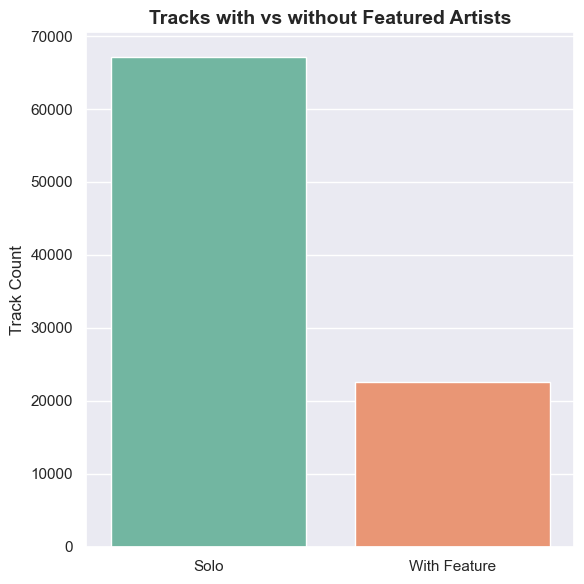

In [30]:
plt.figure(figsize=(6, 6))
feature_counts = spotify_df['is_feature'].value_counts()
sns.barplot(x=feature_counts.index.map({True: 'With Feature', False: 'Solo'}),
            y=feature_counts.values, hue= feature_counts.index, legend= False, palette='Set2')
plt.title('Tracks with vs without Featured Artists', fontsize=14, weight='bold')
plt.ylabel('Track Count')
plt.xlabel('')
plt.tight_layout()
plt.show()

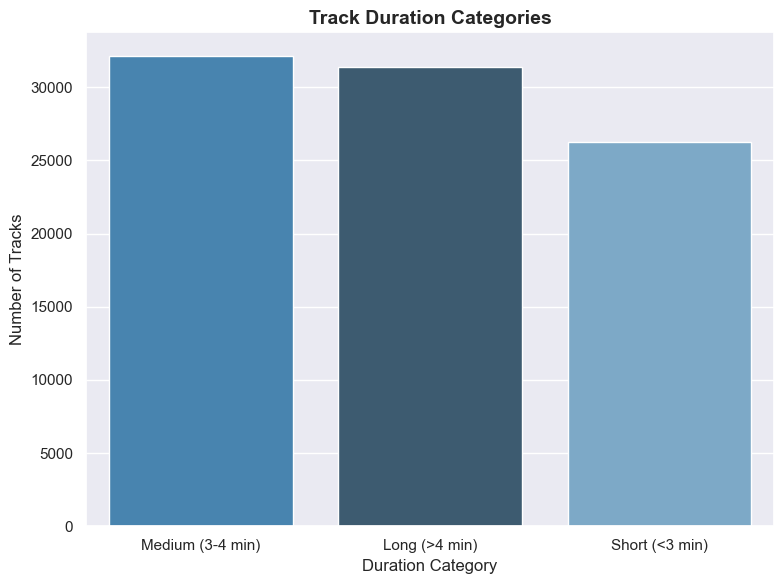

In [31]:
plt.figure(figsize=(8, 6))
sns.countplot(data=spotify_df, x='duration_cat', hue= 'duration_cat', legend= False, palette='Blues_d', order=spotify_df['duration_cat'].value_counts().index)
plt.title('Track Duration Categories', fontsize=14, weight='bold')
plt.xlabel('Duration Category')
plt.ylabel('Number of Tracks')
plt.tight_layout()
plt.show()

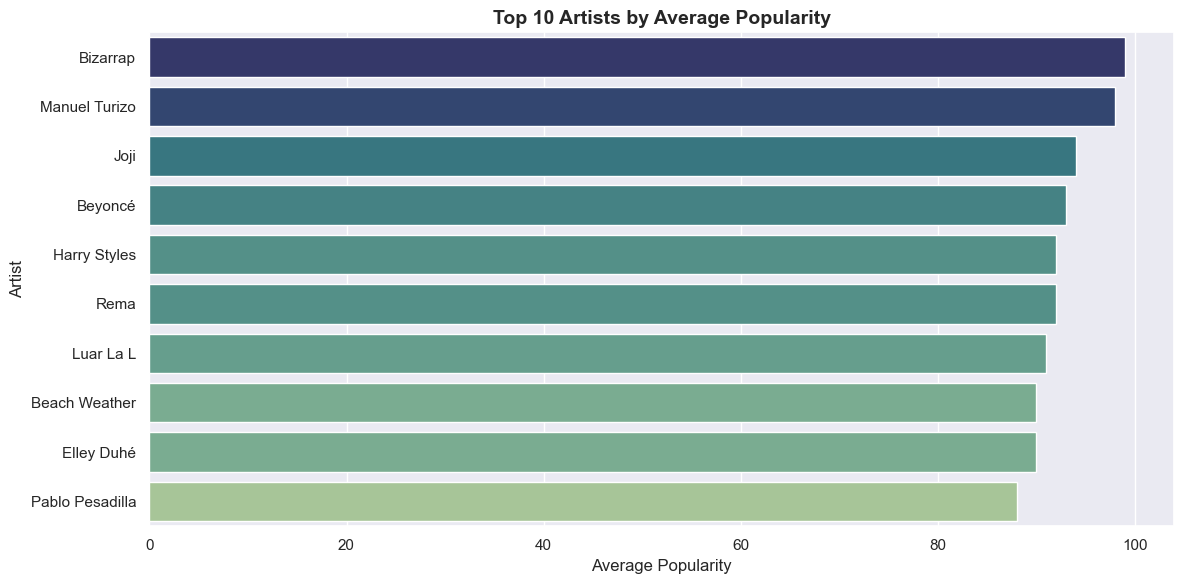

In [32]:
top_popular_artists = (
    spotify_df.groupby('primary_artist')['popularity']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_popular_artists.values, y=top_popular_artists.index, hue = top_popular_artists.values, legend= False, palette='crest')
plt.title('Top 10 Artists by Average Popularity', fontsize=14, weight='bold')
plt.xlabel('Average Popularity')
plt.ylabel('Artist')
plt.tight_layout()
plt.show()

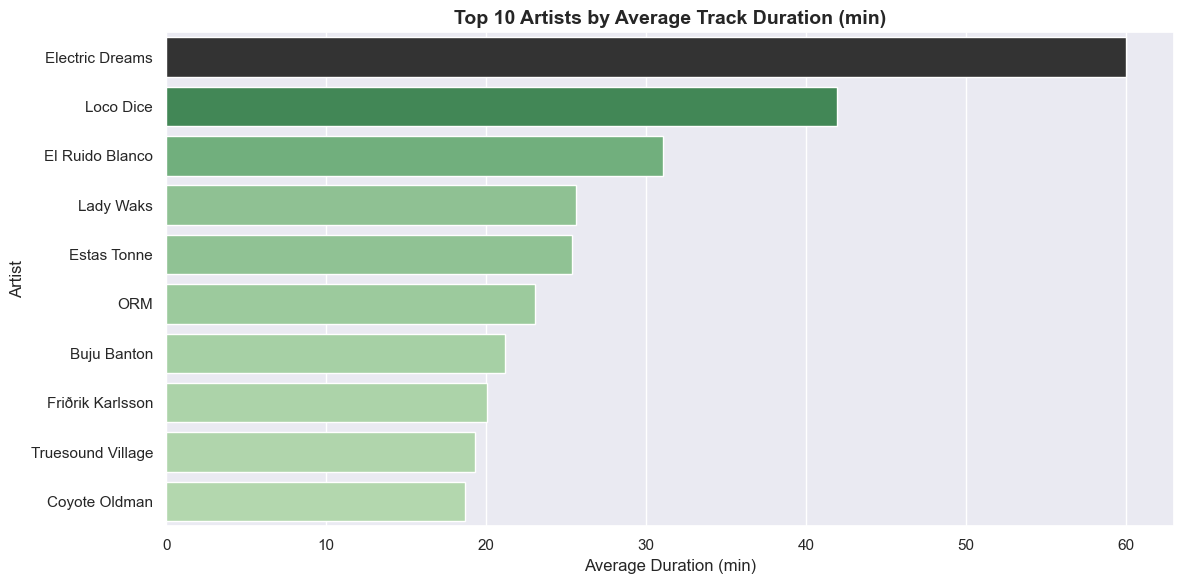

In [33]:
top_long_artists = (
    spotify_df.groupby('primary_artist')['duration_min']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_long_artists.values, y=top_long_artists.index, hue = top_long_artists.values, legend= False, palette='Greens_d')
plt.title('Top 10 Artists by Average Track Duration (min)', fontsize=14, weight='bold')
plt.xlabel('Average Duration (min)')
plt.ylabel('Artist')
plt.tight_layout()
plt.show()


<Figure size 2000x1500 with 0 Axes>

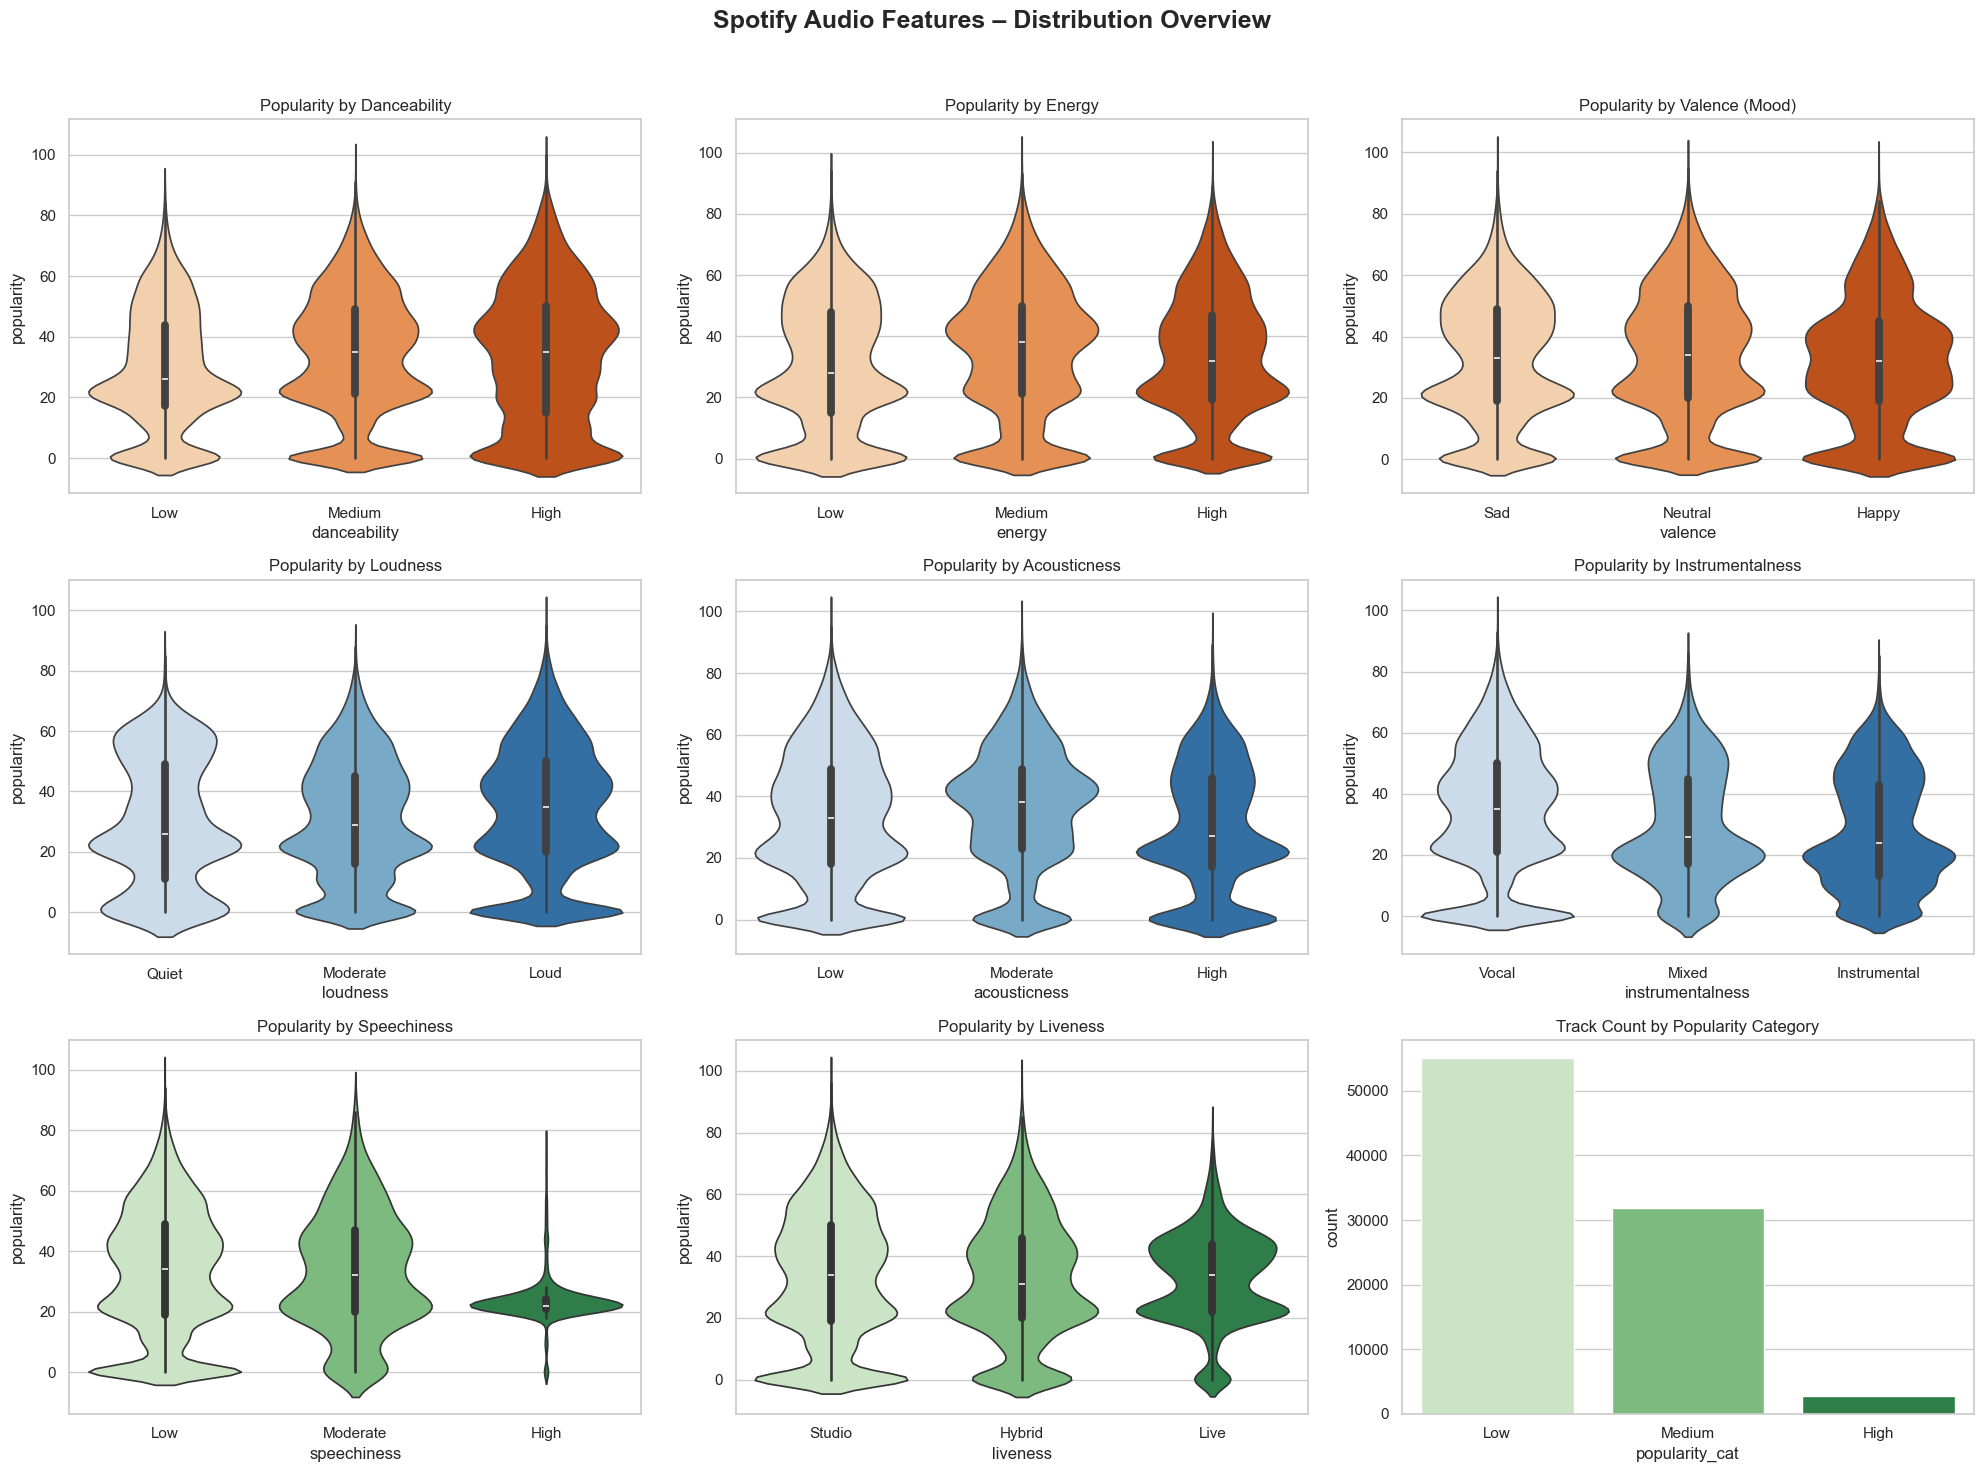

In [34]:
sns.set(style='whitegrid')
plt.figure(figsize=(20, 15))
fig, axs = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle("Spotify Audio Features – Distribution Overview", fontsize=18, fontweight='bold')

sns.violinplot(data=spotify_df, x='danceability', y='popularity', hue='danceability', legend=False, ax=axs[0, 0], palette='Oranges')
axs[0, 0].set_title("Popularity by Danceability")

sns.violinplot(data=spotify_df, x='energy', y='popularity', hue='energy', legend=False, ax=axs[0, 1], palette='Oranges')
axs[0, 1].set_title("Popularity by Energy")

sns.violinplot(data=spotify_df, x='valence', y='popularity', hue='valence', legend=False, ax=axs[0, 2], palette='Oranges')
axs[0, 2].set_title("Popularity by Valence (Mood)")

sns.violinplot(data=spotify_df, x='loudness', y='popularity', hue='loudness', legend=False, ax=axs[1, 0], palette='Blues')
axs[1, 0].set_title("Popularity by Loudness")

sns.violinplot(data=spotify_df, x='acousticness', y='popularity', hue='acousticness', legend=False, ax=axs[1, 1], palette='Blues')
axs[1, 1].set_title("Popularity by Acousticness")

sns.violinplot(data=spotify_df, x='instrumentalness', y='popularity', hue='instrumentalness', legend=False, ax=axs[1, 2], palette='Blues')
axs[1, 2].set_title("Popularity by Instrumentalness")

sns.violinplot(data=spotify_df, x='speechiness', y='popularity', hue='speechiness', legend=False, ax=axs[2, 0], palette='Greens')
axs[2, 0].set_title("Popularity by Speechiness")

sns.violinplot(data=spotify_df, x='liveness', y='popularity', hue='liveness', legend=False, ax=axs[2, 1], palette='Greens')
axs[2, 1].set_title("Popularity by Liveness")

sns.countplot(data=spotify_df, x='popularity_cat', hue='popularity_cat', palette='Greens', ax=axs[2, 2])
axs[2, 2].set_title("Track Count by Popularity Category")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [35]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89740 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   track_id          89740 non-null  object  
 1   artists           89740 non-null  object  
 2   track_name        89740 non-null  object  
 3   popularity        89740 non-null  int64   
 4   explicit          89740 non-null  bool    
 5   danceability      89740 non-null  category
 6   energy            89740 non-null  category
 7   loudness          89672 non-null  category
 8   speechiness       89740 non-null  category
 9   acousticness      89740 non-null  category
 10  instrumentalness  89740 non-null  category
 11  liveness          89740 non-null  category
 12  valence           89740 non-null  category
 13  track_genre       89740 non-null  object  
 14  primary_artist    89740 non-null  object  
 15  is_feature        89740 non-null  bool    
 16  duration_min      89740 no

In [36]:
df_spotify_artists = spotify_df.groupby('primary_artist', as_index=False).agg({
    'track_name': 'count', 
    'popularity': 'mean',
    'danceability': lambda x: x.mode()[0],
    'energy': lambda x: x.mode()[0],
    'speechiness': lambda x: x.mode()[0],
    'instrumentalness': lambda x: x.mode()[0],
    'explicit': lambda x: (x.sum() / len(x)) * 100,
    'duration_min': 'mean',
    'is_feature': lambda x: (x.sum() / len(x)) * 100,
    'track_genre': lambda x: x.mode()[0] 
}).rename(columns={
    'primary_artist': 'artist',
    'track_name': 'total_tracks',
    'popularity': 'spotify_popularity',
    'explicit': 'pct_explicit_tracks',
    'is_feature': 'feature_pct',
    'track_genre': 'spotify_track_genre'
    })

In [37]:
df_spotify_artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17647 entries, 0 to 17646
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   artist               17647 non-null  object  
 1   total_tracks         17647 non-null  int64   
 2   spotify_popularity   17647 non-null  float64 
 3   danceability         17647 non-null  category
 4   energy               17647 non-null  category
 5   speechiness          17647 non-null  category
 6   instrumentalness     17647 non-null  category
 7   pct_explicit_tracks  17647 non-null  float64 
 8   duration_min         17647 non-null  float64 
 9   feature_pct          17647 non-null  float64 
 10  spotify_track_genre  17647 non-null  object  
dtypes: category(4), float64(4), int64(1), object(2)
memory usage: 1.0+ MB


In [38]:
value = "XXXTENTACION"
df_spotify_artists[df_spotify_artists["artist"]== value]

,artist,total_tracks,spotify_popularity,danceability,energy,speechiness,instrumentalness,pct_explicit_tracks,duration_min,feature_pct,spotify_track_genre
16758,XXXTENTACION,98,61.479592,High,Medium,Low,Vocal,80.612245,2.287041,31.632653,emo


In [39]:
df_spotify_artists.sample(5)

,artist,total_tracks,spotify_popularity,danceability,energy,speechiness,instrumentalness,pct_explicit_tracks,duration_min,feature_pct,spotify_track_genre
7047,Jameson Rodgers,1,40.0,Medium,High,Low,Vocal,0.0,3.080000,0.000000,country
8557,Lartiste,3,65.0,High,Medium,Low,Vocal,0.0,3.750000,66.666667,french
5512,Funkstörung,2,12.5,Medium,Low,Low,Vocal,0.0,4.200000,50.000000,idm
6538,Hulder,3,18.0,Low,High,Low,Vocal,0.0,5.656667,0.000000,black-metal
4971,Ezginin Günlügü,2,40.0,Medium,Low,Low,Vocal,0.0,4.290000,0.000000,folk


In [40]:
df_spotify_artists.describe()

,total_tracks,spotify_popularity,pct_explicit_tracks,duration_min,feature_pct
count,17647.000000,17647.000000,17647.000000,17647.000000,17647.000000
mean,5.085284,36.312329,9.570964,3.762123,23.723084
std,10.628703,17.206795,26.644727,1.486477,37.377274
min,1.000000,0.000000,0.000000,0.510000,0.000000
25%,1.000000,23.666667,0.000000,2.950000,0.000000
50%,2.000000,36.000000,0.000000,3.550294,0.000000
75%,5.000000,48.000000,0.000000,4.283333,42.857143
max,332.000000,99.000000,100.000000,60.000000,100.000000


In [41]:
df_spotify_artists.describe(include="object")

,artist,spotify_track_genre
count,17647,17647
unique,17647,113
top,龍藏Ryuzo,french
freq,1,346


In [42]:
df_spotify_artists["artist"].value_counts()

artist
龍藏Ryuzo     1
!nvite      1
#Kids       1
$affie      1
&ME         1
           ..
110         1
10cm        1
10cc        1
102 Boyz    1
1019        1
Name: count, Length: 17647, dtype: int64

In [43]:
df_spotify_artists[['artist']].to_csv('data/raw/artists.csv', index=False)
df_spotify_artists.to_csv('data/clean/spotify_artists.csv', index=False)